# Visualización del preprocesamiento de datos: Embeddings generados para cada secuencia proteica

In [1]:
#Importamos librerias necesarias
import torch
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


Obtenemos y cargamos los embeddings, que están guardados como un diccionario secuencia: embedding en el archivo "concatenated_embeddings_avg_final.pt". Cada secuencia apunta a su embedding
Asimismo, cargamos el dataset en el file "A0A1K4LHP2_CR9114_Phillips_2021_updated_target.csv" para obtener la medida de afinidad de cada secuencia mutada de anticuerpo.

Lo convertimos todo a un dataframe final con el embedding (sus 1536 valores en columnas) y la Kd de cada secuencia (columna DMS_score). En total tenemos 65093 rows × 1537 columns

In [2]:

# Ruta a los embeddings promedio y al CSV con DMS_score (kd)
emb_path = "/media/nova/datos/diego/test/250610_esm3/results/embeddings_avg/concatenated_embeddings_avg_final.pt"
csv_path = "/media/nova/datos/diego/test/250610_esm3/data/A0A1K4LHP2_CR9114_Phillips_2021_updated_target.csv"

# Cargar embeddings (dict: sequence -> tensor[1536])
embedding_map = torch.load(emb_path, map_location="cpu")

# Convertir a DataFrame
sequences = []
emb_list = []
for seq, emb in embedding_map.items():
    sequences.append(seq)
    emb_list.append(emb.numpy())
emb_matrix = np.vstack(emb_list)
df_emb = pd.DataFrame(emb_matrix, index=sequences)

# Cargar CSV y extraer DMS_score
df_scores = pd.read_csv(csv_path)
df_scores = df_scores.set_index("sequence")["DMS_score"]

# Unir embeddings con scores
df = df_emb.join(df_scores, how="inner")
X = df.iloc[:, :-1].values  # embeddings
y = df["DMS_score"].values  # kd values
df



,0,1,2,3,4,5,6,7,8,9,...,1527,1528,1529,1530,1531,1532,1533,1534,1535,DMS_score
QVQLVQSGAEVKKPGSSVKVSCKASGGTSSSYAISWVRQAPGQGLEWMGGISPIFGSTNYAQKFQGRVTITADISTSTAYMELSSLTSEDTAVYYCARHGNYYYYSGMDVWGQGTTVTVSS,-182.569092,-69.961128,-102.819099,3.869156,-70.344513,172.563263,-59.345528,103.228401,-159.084351,-74.073677,...,65.669716,58.850609,13.831301,115.139732,164.119537,12.058943,-121.824692,-6.122713,-61.453503,9.484586
QVQLVQSGAEVKKPGSSVKVSCKASGGTFSSYAISWVRQAPGQGLEWMGGISPIFGSTAYAQKFQGRVTISADISTNTAYMELNSLRSEDTAVYFCARHGNYYYYSGMDVWGQGTTVTVSS,-181.545212,-62.629570,-100.062500,0.206301,-64.743896,164.034546,-52.764732,90.076218,-155.246948,-79.304367,...,63.709854,49.646084,8.876270,105.313004,149.700699,8.164634,-123.081802,11.200457,-55.586124,9.430991
QVQLVQSGAEVKKPGSSVKVSCKASGGTSNNYAISWVRQAPGQGLEWMGGISPIFGSTNYAQKFQGRVTITADISTNTAYMELNSLTSEDTAVYFCARHGNYYYYSGMDVWGQGTTVTVSS,-181.265747,-73.668190,-99.699692,2.479167,-78.674797,168.023880,-57.202614,97.421234,-152.091461,-67.360771,...,59.292679,65.004570,11.855436,119.495934,164.917297,6.922764,-129.946899,4.235264,-56.379570,9.497006
QVQLVQSGAEVKKPGSSVKVSCKASGGTSSNYAISWVRQAPGQGLEWMGGISPIFGSTAYAQKFQGRVTISADISSSTAYMELNSLTSEDTAVYFCARHGNYYYYYGMDVWGQGTTVTVSS,-178.237793,-69.875504,-98.317070,4.455285,-75.725609,169.518539,-57.181908,93.628044,-148.664627,-71.105179,...,58.714935,64.338158,13.853658,112.747452,155.638580,8.286077,-125.623978,6.536077,-60.431908,9.499691
QVQLVQSGAEVKKPGSSVKVSCKASGGTSNNYAISWVRQAPGQGLEWMGGISPIFGSAAYAQKFQGRVTITADISTSTAYMELSSLTSEDTAVYFCARHGNYYYYSGMDVWGQGTTVTVSS,-184.093491,-65.328758,-101.672249,3.882876,-74.170731,164.491348,-61.430637,93.715446,-152.443085,-71.486786,...,59.569103,68.386688,8.534044,116.052330,160.321136,9.268292,-131.753555,6.935213,-60.287346,9.380737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QVQLVQSGAEVKKPGSSVKVSCKASGGTSNNYAISWVRQAPGQGLEWMGGIIPIFGTTNYAQKFQGRVTISADKFTNTAYMELNSLRSEDTAVYFCARHGNYYYYSGMDVWGQGTTVTVSS,-180.520828,-66.993393,-98.419708,4.238186,-62.505077,163.655869,-45.129570,98.296745,-164.670731,-79.031502,...,58.367374,49.710365,4.344512,103.362289,163.649124,13.007113,-122.374237,-8.178226,-58.038807,9.372797
QVQLVQSGAEVKKPGSSVKVSCKASGGTSNNYAISWVRQAPGQGLEWMGGIIPIFGTAAYAQKFQGRVTISADIFSSTAYMELNSLTSEDTAVYFCARHGNYYYYSGMDVWGQGTTVTVSS,-183.092987,-63.420219,-98.183937,1.156250,-67.638466,161.978394,-52.927082,94.200203,-149.677338,-75.205788,...,62.926319,67.372711,4.626016,113.738815,164.274643,7.733232,-127.363815,1.480437,-58.753300,9.467091
QVQLVQSGAEVKKPGSSVKVSCKASGGTSNNYAISWVRQAPGQGLEWMGGIIPIFGTAAYAQKFQGRVTISADIFTNTAYMELNSLRSEDTAVYFCARHGNYYYYSGMDVWGQGTTVTVSS,-183.773361,-66.751015,-96.599846,4.532639,-69.763206,162.369400,-46.451218,96.741356,-154.883636,-75.377029,...,61.550556,59.658089,4.664888,110.784546,167.535049,8.544715,-126.160561,-1.141641,-56.823170,9.513037
QVQLVQSGAEVKKPGSSVKVSCKASGGTSNNYAISWVRQAPGQGLEWMGGIIPIFGTAAYAQKFQGRVTISADIFTSTAYMELSSLRSEDTAVYFCARHGNYYYYSGMDVWGQGTTVTVSS,-183.558929,-62.868900,-98.743896,4.188389,-64.388206,161.329269,-48.530231,94.537849,-158.082825,-80.199181,...,62.559448,59.281628,5.001270,107.295219,161.379059,11.204776,-125.387955,-0.715193,-60.153198,9.525160


Ahora, realizamos un PCA, para reducir la dimensionalidad, que acomplejiza la interpretacion y obtencion de informacion relevante de los embeddings, de 1536 a solo 50 dimensiones. Así nos deshacemos de **dimensiones irrelevantes** y aceleramos el t-SNE, el cual es muy costoso computacionalmente de por sí.

¿Porqué realizamos t-SNE? Queremos proyectar las 50 dimensiones más importantes a solo 2 dimensiones, pero preservando siempre las estructuras locales, que es algo que se pierde en el PCA convencional. Así, en la visualización 2D, los puntos cercanos también serán embeddings "semánticamente cercanos" en el espacio latente de ESM3.

Luego, coloreamos cada punto del t-SNE de acuerdo a su valor de la Kd

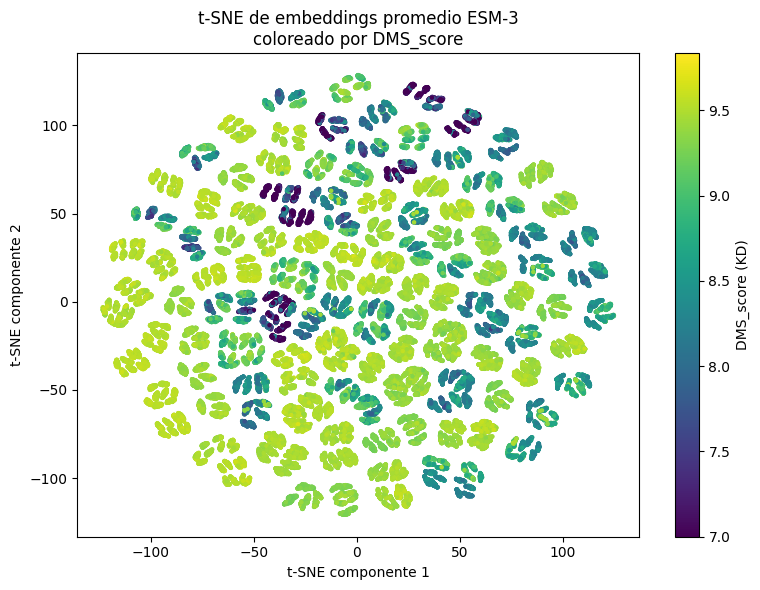

In [3]:
# Paso 1: PCA a 50 componentes para acelerar t-SNE
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Paso 2: t-SNE a 2 dimensiones
tsne = TSNE(n_components=2, init='pca', random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_pca)

# Plot t-SNE coloreado por DMS_score
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=5)
plt.colorbar(sc, label="DMS_score (KD)")
plt.title("t-SNE de embeddings promedio ESM-3\ncoloreado por DMS_score")
plt.xlabel("t-SNE componente 1")
plt.ylabel("t-SNE componente 2")
plt.tight_layout()
plt.show()



El objetivo de realizar el t-SNE y constrastarlo con la dsitribución de la Kd es detectar si hay alguna correlación oculta en el embedding entre "cómo pliega/qué region CDR mutada tiene" y "afinidad al antigeno". Esta relacion deberia emerger como grupos de colores similares. 

## Clusters con KD bajo en todos sus puntos (color morado):

* Vemos que las secuencias que mejor se unen comparten patrones de mutación (o características estructurales de la CDR) que el modelo de embeddings capta de forma consistente. Quizá cambios en la misma región CDR u orientaciones similares de cadenas laterales hacen que sus vectores estén cerca.

## Múltiples clusters con KD alto (colores más claros):

* Hay muchas maneras en que mutaciones no mejoran la unión, dando embeddings diversos sin un patrón único.

# Conclusión

ESM3 sí captura cierta información estructural/funcional general de la zona mutada: los anticuerpos con mejores scores no están esparcidos al azar sino más cohesionados. 

**OJO**: No captura directamente el reconocimiento de antígeno, porque ESM-3 no fue entrenado para predecir KD ni conocer antígenos. Lo que ves es una correlación indirecta: la combinación de features (SS8, SASA, keywords, etc.) da vectores que, en algunos casos, coinciden con mutaciones que mejoran plegamiento o exposición de la CDR, y eso correlaciona con unión más fuerte.   